In [2]:

import src.MCTS as MCTS
from src.Environments import StatelessGym
from src.Experiment import Experiment, RandomExperiment, ParametrizedRandomExperiment
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import median_absolute_error, mean_squared_log_error, max_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, mean_tweedie_deviance
from sklearn.preprocessing import OneHotEncoder
import ast
import math

In [3]:
def encode_maze(maze):
    num_rows = len(maze)
    num_cols = len(maze[0])

    encoded_maze = []

    for i in range(num_rows):
        for j in range(num_cols):
            if maze[i][j] == 'S':
                encoded_maze.append(0)
            elif maze[i][j] == 'F':
                encoded_maze.append(1)
            elif maze[i][j] == 'H':
                encoded_maze.append(2)
            elif maze[i][j] == 'G':
                encoded_maze.append(3)
            elif maze[i][j] == 'E':
                encoded_maze.append(4)
    return encoded_maze

def add_padding(map, target_size):
    current_size = len(map)
    diff = target_size - current_size
    if diff < 0:
        raise Exception("Current map size is greater than target size")
    elif diff == 0:
        return map
    else:
        result = []
        padding = diff // 2
        left_out = diff % 2
        for i in range(padding):
            result.append('E' * target_size)
        for row in map:
            new_row = 'E' * padding + row + 'E' * padding + 'E' * left_out
            result.append(new_row)
        for i in range(padding + left_out):
            result.append('E' * target_size)
        return result
            

In [4]:
import ast
directory = "../datasets/FrozenLake-v1_m4-4_s1-100_t1/"
dataset_names = os.listdir(directory)
dataset = pd.DataFrame()
print (dataset_names)

for dataset_name in dataset_names:
    dataset = dataset.append(pd.read_csv(directory + dataset_name), ignore_index=True)
    
padding = 4

if 'Map' in dataset.columns:
    if padding > 0: 
        dataset['List_Map'] = dataset['Map'].apply(ast.literal_eval).apply(lambda x: add_padding(x, padding))
    else: 
        dataset['List_Map'] = dataset['Map'].apply(ast.literal_eval)
    #dataset['F_count'] = dataset['Map'].apply(lambda x: sum(row.count('F') for row in x))
    dataset['Encoded_Map'] = dataset['List_Map'].apply(lambda x: encode_maze(x))
print(dataset)
dataset.describe()

['Boosting2_0_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_10_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_11_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_12_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_13_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_14_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_15_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_16_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_17_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_18_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_19_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_1_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_20_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_21_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_22_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_23_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_24_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_25_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_26_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_27_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_28_1500_t1_m4-4_FrozenLake-v1.csv', 'Boosting2_29_

Return  Discounted Return
count  527127.000000      527127.000000
mean        0.725267           0.679525
std         0.446380           0.420716
min         0.000000           0.000000
25%         0.000000           0.000000
50%         1.000000           0.930430
75%         1.000000           0.970402
max         1.000000           0.985090

In [14]:
models = {
    #'LinearRegression': LinearRegression(),
    # #'Ridge': Ridge(alpha=1.0),
    # #'Lasso': Lasso(alpha=1.0),
    # #'ElasticNet':  ElasticNet(alpha=1.0, l1_ratio=0.5),
    #'SVR': SVR(),
    #'DecisionTreeRegressor': DecisionTreeRegressor(),
    #'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100),
    #'KNeighborsRegressor': KNeighborsRegressor(n_neighbors=5),
    #'MLPRegressor': MLPRegressor(hidden_layer_sizes=(10, 10, 10), activation='tanh', max_iter=100000, n_iter_no_change=100, tol=1e-6)
}

## Without Maps

Training set size: 1
Training error: 0.000000
Test error: 0.221533

Training set size: 21
Training error: 0.001281
Test error: 0.105430

Training set size: 41
Training error: 0.003943
Test error: 0.092870

Training set size: 61
Training error: 0.006047
Test error: 0.069692

Training set size: 81
Training error: 0.007448
Test error: 0.078898

Training set size: 100
Training error: 0.007585
Test error: 0.074637

Training set size: 600
Training error: 0.008690
Test error: 0.035735

Training set size: 1100
Training error: 0.006554
Test error: 0.032989

Training set size: 1600
Training error: 0.005476
Test error: 0.023044

Training set size: 2100
Training error: 0.005153
Test error: 0.029165

Training set size: 2600
Training error: 0.004452
Test error: 0.023687

Training set size: 3100
Training error: 0.004194
Test error: 0.021098

Training set size: 3600
Training error: 0.003818
Test error: 0.025221

Training set size: 4100
Training error: 0.003608
Test error: 0.021847

Training set size: 

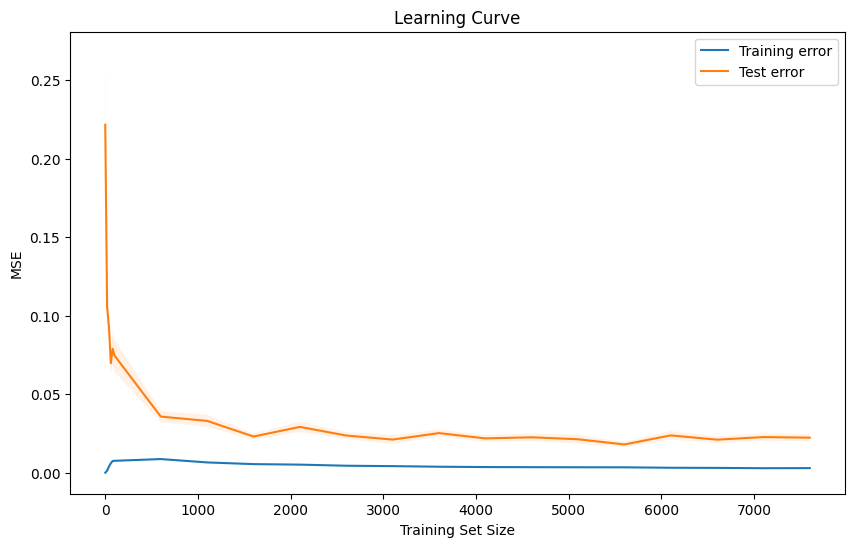

[0.         0.0012807  0.00394276 0.00604682 0.00744769 0.0075851
 0.00869037 0.00655383 0.00547628 0.00515251 0.00445156 0.00419413
 0.00381757 0.00360762 0.00352963 0.00347028 0.00344785 0.00316496
 0.00307282 0.00287521 0.00293656]
[0.22153317 0.10543019 0.09286992 0.0696923  0.07889792 0.07463732
 0.03573468 0.03298949 0.02304354 0.02916483 0.02368739 0.0210982
 0.02522093 0.02184653 0.02254962 0.02129567 0.01799144 0.02377158
 0.02103871 0.0226998  0.02231784]


In [75]:
#Getting min and max number of simulations
sim_min = dataset['Simulations'].min()
sim_max = dataset['Simulations'].max()

#Features to be used in the model
features = ['Simulations']

#Folds
fold = 25

train_sizes = list(range(1, 100, 20)) + list(range(100, 8000, 500))
train_scores = []
test_scores = []
for training_set_size in  train_sizes:
    train_scores.append([])
    test_scores.append([])
    
    for i in range(fold):
        #Randomly sampling number of simulations to be included in the test and training set
        test_sims = np.sort(np.random.choice(np.arange(sim_min, sim_max + 1), size=math.ceil((sim_max - sim_min + 1) * 0.10), replace=False))
        #training_sims = np.setdiff1d(np.arange(sim_min, sim_max + 1), test_sims)

        #Creating test set by taking average for test set simulations
        test_set_x = test_sims.reshape(-1, len(features))
        test_set_y = dataset.loc[dataset['Simulations'].isin(test_sims)].groupby(['Simulations']).mean()['Discounted Return'].values
        
        #Creating training set by sampling sim numbers for training set from the remainnig datapoints
        training_set = dataset[dataset['Simulations'].isin(test_sims).apply(lambda x: not x)].sample(n=training_set_size, replace=False)
        
        training_set_x = training_set[features].values.reshape(-1, len(features))
        training_set_y = training_set['Discounted Return'].values
        
        #Creating training score sets
        training_score_set = training_set.groupby(['Simulations']).mean()['Discounted Return']
        training_score_set_x = training_score_set.index.values.reshape(-1, len(features))
        training_score_set_y = training_score_set.values
        
        # print(test_sims)
        # print(training_score_set)
        # print(training_score_set_x.shape)
        # print(training_score_set_y.shape)

        #Training
        for model_name, model in models.items():
            model.fit(training_set_x, training_set_y)
            #Predicting on test set
            y_pred = model.predict(test_set_x)
            #Calculating MSE
            test_score = mean_absolute_error(test_set_y, y_pred)
            test_scores[-1].append(test_score)
            #Predicting on training set
            y_pred = model.predict(training_score_set_x)
            train_score = mean_absolute_error(training_score_set_y, y_pred)
            train_scores[-1].append(train_score)
    print("Training set size: %d\nTraining error: %f\nTest error: %f\n" % (training_set_size, np.mean(train_scores[-1]), np.mean(test_scores[-1])))
        
# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1) / np.sqrt(fold)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1) / np.sqrt(fold)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
#plt.ylim([0, 1])
plt.show()

print(train_mean)
print(test_mean)

## With Different Maps

In [180]:
#Unique maps
unique_maps = []
for map in dataset["Map"].unique():
    unique_maps.append(map)
map_count = len(unique_maps)
test_maps = np.random.default_rng().choice(unique_maps, size=map_count//5, replace=False)

#Creating Test Set
test_set = dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).mean()["Discounted Return"]
test_set_x = []
test_set_y = []
for i in range(len(test_set)):
    test_set_x.append([test_set.index[i][1]] + encode_maze(test_set.index[i][0]))
    test_set_y.append(test_set[i])

#Creating Training Set
training_set = dataset[~dataset['Map'].isin(test_maps)]
training_set_x = np.append(training_set["Simulations"].values.reshape(-1, 1), training_set['Encoded_Map'].apply(pd.Series).values, axis=1)
training_set_y = training_set["Discounted Return"].values

#Creating Training Score Set
training_score_set = training_set.groupby(["Map", "Simulations"]).mean()["Discounted Return"]
training_score_set_x = []
training_score_set_y = []
for i in range(len(training_score_set)):
    training_score_set_x.append([training_score_set.index[i][1]] + encode_maze(training_score_set.index[i][0]))
    training_score_set_y.append(training_score_set[i])

#test_set.describe()
print(training_score_set_x)
print(len(test_set_y))

[[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [5, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [6, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [7, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [8, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [9, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [10, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [11, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [12, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [13, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [14, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [15, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [16, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [17, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [18, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3], [19, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [90]:
#Unique maps
unique_maps = []
for map in dataset["Map"].unique():
    if len(ast.literal_eval(map)) == 7:
        unique_maps.append(map)
map_count = len(unique_maps)
print("Number of unique maps: ", map_count)

Number of unique maps:  29193


Training set size: 1
Training error: 0.000000 ± 0.000000
Test error: 0.507582 ± 0.193474

Training set size: 8
Training error: 0.000000 ± 0.000000
Test error: 0.189698 ± 0.010656

Training set size: 16
Training error: 0.000000 ± 0.000000
Test error: 0.181237 ± 0.050596

Training set size: 25
Training error: 0.000008 ± 0.000004
Test error: 0.139561 ± 0.022239

Training set size: 75
Training error: 0.003353 ± 0.000569
Test error: 0.133772 ± 0.010012

Training set size: 100
Training error: 0.005887 ± 0.000630
Test error: 0.117311 ± 0.007786

Training set size: 1000
Training error: 0.072642 ± 0.002608
Test error: 0.073540 ± 0.001248

Training set size: 5000
Training error: 0.080612 ± 0.001789
Test error: 0.066222 ± 0.001074

Training set size: 10000
Training error: 0.084590 ± 0.001530
Test error: 0.066351 ± 0.001047

Training set size: 15000
Training error: 0.082410 ± 0.000969
Test error: 0.065616 ± 0.001345

Training set size: 30000
Training error: 0.079282 ± 0.000328
Test error: 0.065773

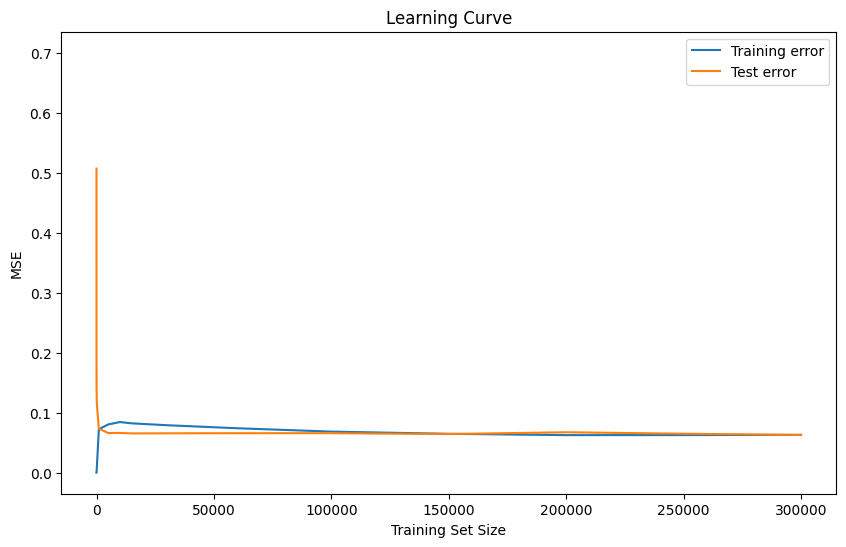

[0.00000000e+00 1.32145608e-10 8.54784559e-08 8.03527179e-06
 3.35271778e-03 5.88748266e-03 7.26416303e-02 8.06118299e-02
 8.45899960e-02 8.24095036e-02 7.92818505e-02 7.42262989e-02
 6.86262119e-02 6.49281867e-02 6.27532797e-02 6.28283834e-02
 6.32360902e-02]
[0.50758201 0.18969828 0.18123697 0.13956059 0.13377244 0.11731067
 0.07353958 0.0662218  0.06635062 0.06561591 0.06577254 0.06597983
 0.06596705 0.06454421 0.06753944 0.06510008 0.06306804]


In [16]:
#Getting min and max number of simulations
sim_min = dataset['Simulations'].min()
sim_max = dataset['Simulations'].max()

#Features to be used in the model
features = ['Simulations']

#Unique maps
unique_maps = []
for map in dataset["Map"].unique():
    unique_maps.append(map)
map_count = len(unique_maps)

#Folds
fold = 3

#Test set size
test_set_size = math.ceil((map_count * 0.2))
#test_set_size = 3775
#Train set sizes
train_sizes = [1, 8, 16, 25, 75, 100, 1000, 5000, 10000, 15000, 30000, 60000, 100000, 150000, 200000, 250000, 300000]
#train_sizes = [1000, 2000, 3000, 4000, 5000]
#train_sizes = [1, 25, 100]

train_scores = []
test_scores = []

for training_set_size in  train_sizes:
    train_scores.append([])
    test_scores.append([])
    
    for i in range(fold):
        #Creating Test Set
        test_maps = np.random.default_rng().choice(unique_maps, size=test_set_size, replace=False)
        test_set = dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).mean()["Discounted Return"]
        test_set_x = []
        test_set_y = []
        for j in range(len(test_set)):
            test_set_x.append([test_set.index[j][1]] + encode_maze(add_padding(ast.literal_eval(test_set.index[j][0]), padding)))
            test_set_y.append(test_set[j])

        #Creating Training Set
        training_set = dataset[~dataset['Map'].isin(test_maps)].sample(n=training_set_size, replace=False)
        training_set_x = np.append(training_set["Simulations"].values.reshape(-1, 1), training_set['Encoded_Map'].apply(pd.Series).values, axis=1)
        training_set_y = training_set["Discounted Return"].values

        #print("Maps seen in training: %d" % (len(training_set["Map"].unique())))
        #Creating Training Score Set
        training_score_set = training_set.groupby(["Map", "Simulations"]).mean()["Discounted Return"]
        training_score_set_x = []
        training_score_set_y = []
        for j in range(len(training_score_set)):
            training_score_set_x.append([training_score_set.index[j][1]] + encode_maze(add_padding(ast.literal_eval(training_score_set.index[j][0]), padding)))
            training_score_set_y.append(training_score_set[j])

        # print("train score set info: ")
        # a = (training_set.groupby(["Map", "Simulations"]).std()["Discounted Return"] / (training_set.groupby(["Map", "Simulations"]).count()["Discounted Return"] ** 0.5))
        # print(a.mean())
        # print("test set info: ")
        # b = (dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).std()["Discounted Return"] / (dataset[dataset['Map'].isin(test_maps)].groupby(["Map", "Simulations"]).count()["Discounted Return"] ** 0.5))
        # print(b.mean())
        #Training
        for model_name, model in models.items():
            model.fit(training_set_x, training_set_y)
            #Predicting on test set
            y_pred = model.predict(test_set_x)
            #Calculating MSE
            test_score = mean_squared_error(test_set_y, y_pred)
            test_scores[-1].append(test_score)
            #Predicting on training set
            y_pred = model.predict(training_score_set_x)
            train_score = mean_squared_error(training_score_set_y, y_pred)
            train_scores[-1].append(train_score)
        # print("Fold: %d\nTraining set size: %d\nTraining error: %f\nTest error: %f\n" % (i, training_set_size, train_score, test_score))
    print("Training set size: %d\nTraining error: %f ± %f\nTest error: %f ± %f\n" % (training_set_size, np.mean(train_scores[-1]), np.std(train_scores[-1]), np.mean(test_scores[-1]), np.std(test_scores[-1])))
        
# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training error')
plt.plot(train_sizes, test_mean, label='Test error')

# Add error bands showing the standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and title
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.title('Learning Curve')
plt.legend(loc='best')
#plt.ylim([0, 1])
plt.show()

print(train_mean)
print(test_mean)

In [17]:
print(train_mean, train_std, test_mean, test_std)

[0.00000000e+00 1.32145608e-10 8.54784559e-08 8.03527179e-06
 3.35271778e-03 5.88748266e-03 7.26416303e-02 8.06118299e-02
 8.45899960e-02 8.24095036e-02 7.92818505e-02 7.42262989e-02
 6.86262119e-02 6.49281867e-02 6.27532797e-02 6.28283834e-02
 6.32360902e-02] [0.00000000e+00 3.65620843e-11 3.26463835e-08 4.26812159e-06
 5.69027307e-04 6.29585510e-04 2.60808944e-03 1.78943462e-03
 1.53041259e-03 9.69394814e-04 3.28357141e-04 6.82987066e-04
 1.22161219e-04 6.65341504e-04 4.14973408e-04 2.10114159e-04
 1.84374044e-04] [0.50758201 0.18969828 0.18123697 0.13956059 0.13377244 0.11731067
 0.07353958 0.0662218  0.06635062 0.06561591 0.06577254 0.06597983
 0.06596705 0.06454421 0.06753944 0.06510008 0.06306804] [0.19347366 0.01065637 0.05059647 0.02223905 0.01001174 0.00778555
 0.00124795 0.00107394 0.0010467  0.00134509 0.0011575  0.00244277
 0.00061828 0.00216114 0.00077579 0.00100921 0.00107838]
